Epoch 1/100 - Train Loss: 0.0478
Epoch 2/100 - Train Loss: 0.0330
Epoch 3/100 - Train Loss: 0.0297
Epoch 4/100 - Train Loss: 0.0280
Epoch 5/100 - Train Loss: 0.0270
Epoch 6/100 - Train Loss: 0.0263
Epoch 7/100 - Train Loss: 0.0258
Epoch 8/100 - Train Loss: 0.0254
Epoch 9/100 - Train Loss: 0.0250
Epoch 10/100 - Train Loss: 0.0247
Epoch 11/100 - Train Loss: 0.0245
Epoch 12/100 - Train Loss: 0.0242
Epoch 13/100 - Train Loss: 0.0239
Epoch 14/100 - Train Loss: 0.0237
Epoch 15/100 - Train Loss: 0.0236
Epoch 16/100 - Train Loss: 0.0234
Epoch 17/100 - Train Loss: 0.0232
Epoch 18/100 - Train Loss: 0.0231
Epoch 19/100 - Train Loss: 0.0230
Epoch 20/100 - Train Loss: 0.0228
Epoch 21/100 - Train Loss: 0.0227
Epoch 22/100 - Train Loss: 0.0226
Epoch 23/100 - Train Loss: 0.0225
Epoch 24/100 - Train Loss: 0.0224
Epoch 25/100 - Train Loss: 0.0223
Epoch 26/100 - Train Loss: 0.0223
Epoch 27/100 - Train Loss: 0.0221
Epoch 28/100 - Train Loss: 0.0221
Epoch 29/100 - Train Loss: 0.0220
Epoch 30/100 - Train Lo

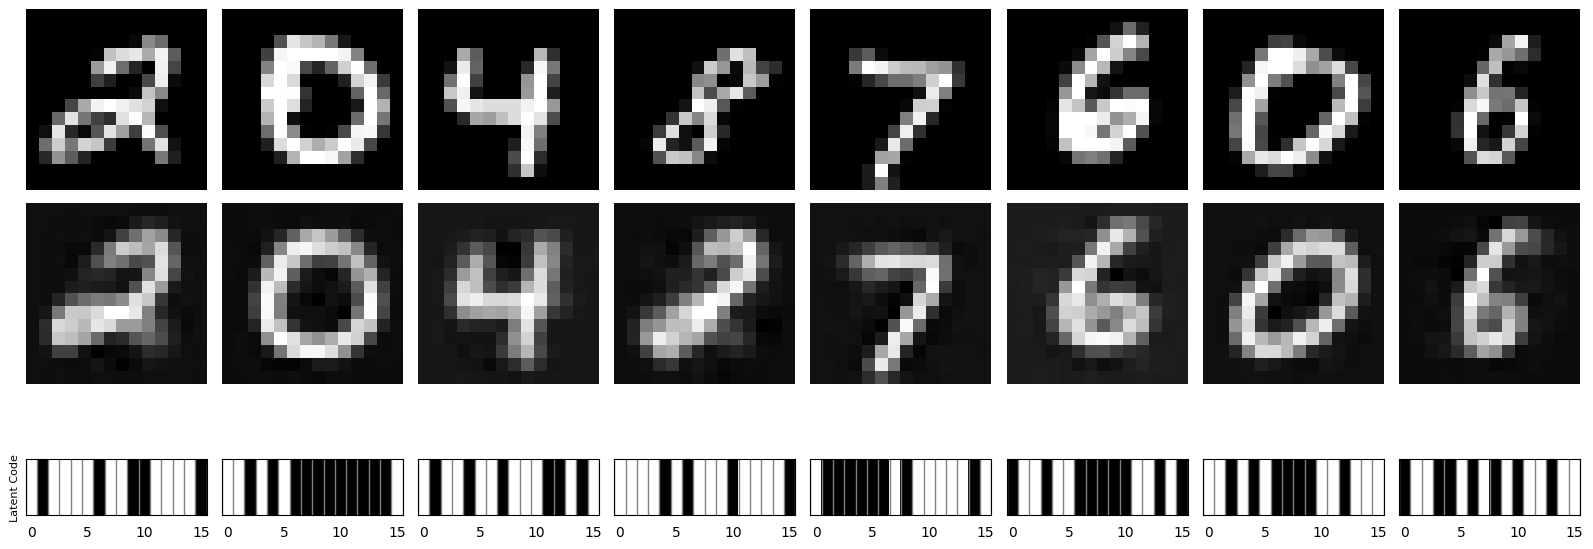

2025-04-04 12:26:23.272017: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [1]:
from jax import random, lax
import optax
import matplotlib.pyplot as plt
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer

rng = random.PRNGKey(0)
binary_vae = model(latents=16)
input_shape = (64, 196)
learning_rate = 3e-4

# Load MNIST dataset for training and testing
train_dataset = MNISTDataset(split='train', batch_size=64, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=64, image_size=(14, 14)).load()

# Create an instance of the trainer with your binary VAE model
trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

# Train the model for 10 epochs
trainer.train(train_dataset, batch_size=64, num_epochs=100)

# Plot some reconstructions from the test dataset
trainer.plot_reconstructions(test_dataset, num_images=8)